# `SOLAR ENERGY AND ELECTRICAL USAGE ANALYSIS`

DATA ANALYST: _RONALD ONGORI NYAGAKA_

EMAIL: _nyagaka@outlook.com_

### `OBJECTIVE`

* Develop and Document an Analytical Model to Evaluate the Cost Savings and Viability of Installing a Battery System for Storing Excess Solar Electricity in a Household

### `KEY POINTS`
*Electricity Usage and Generation:*
- Households require electricity for their needs.
- Electricity can be obtained from a provider or generated using solar panels.
- Naomi has solar panels on her house to generate electricity from the sun.
- Solar-generated electricity meets current household needs, reducing costs.
- Excess solar electricity isn't stored and goes unused.
- Naomi considers installing a battery to store excess solar power.

*Battery Details:*
- Battery costs $7,000.
- Installation date: 1 January 2022.
- Expected lifetime: 20 years.
- Battery capacity: Maximum 12.5 kWh, minimum 0 kWh.
- Excess solar power can't be stored when battery is full.
- Battery discharges when solar power is insufficient.

*Electricity Pricing and Inflation:*
- Electricity measured in kWh.
- Cost of purchased electricity: $0.17/kWh from 1 January 2022.
- Electricity price inflation: 4% p.a. from 1 January 2023.
- Naomi estimates additional 0.25% p.a. increase due to climate change focus.

*Data Analysis:*
- Naomi provides hourly solar generation and electricity usage data for 2020.
- Analysis needed to assess potential savings from battery.
- Data excludes 29 February.

*Key Dates:*
- Battery installation: 1 January 2022.
- Inflation adjustment: 1 January 2023 and each subsequent year.
- Yearly additional increase (Naomi's estimate): Starting from 1 January 2023.

In [183]:
## Importing the necessary libraries
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('bmh')

import warnings

warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)

### `1. DATA UNDERSTANDING`


In [184]:
# loading the dataset

df = pd.read_excel('Junior Data Analyst _ Data.xlsx', skiprows=2)

In [185]:
# viewing the first five rows

df.head()

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh)
0,0,2020-01-01 00:00:00,0.0,1.509849
1,1,2020-01-01 01:00:00,0.0,1.411859
2,2,2020-01-01 02:00:00,0.0,1.023898
3,3,2020-01-01 03:00:00,0.0,0.642000
4,4,2020-01-01 04:00:00,0.0,0.960000


In [186]:
# viewing the shape of our dataset

print('the dataframe has:',df.shape[0], 'rows', 'and' ,df.shape[1], 'columns')

the dataframe has: 8760 rows and 4 columns


In [187]:
# checking for data types and any potential null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 4 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Hour                                8760 non-null   int64         
 1   Date/hour start                     8760 non-null   datetime64[ns]
 2   Solar electricity generation (kWh)  8760 non-null   float64       
 3   Electricity usage (kWh)             8760 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 273.9 KB


>> from this we can see that that all data types are in line with their intended use for our analysis

In [188]:
# getting the initial statistics of our data set

df.describe().T

,count,mean,min,25%,50%,75%,max,std
Hour,8760.0,11.5,0.0,5.75,11.5,17.25,23.0,6.922582
Date/hour start,8760,2020-07-02 07:37:13.972602624,2020-01-01 00:00:00,2020-04-02 05:45:00,2020-07-02 11:30:00,2020-10-01 17:15:00,2020-12-31 23:00:00,NaN
Solar electricity generation (kWh),8760.0,1.11675,0.0,0.0,0.024,1.27275,13.05,2.026098
Electricity usage (kWh),8760.0,7.312704,-12.624,0.3,0.621,1.686,46000.0,491.479806


>> From this we can already see there are some potential outliers with our dataset

>> This is from the max of electricity usage and the minimum  as well

>> This figures have skewed the dataset various measures hence the `std` and `mean` are not of much use until we take care of the outliers

### `2. DATA CLEANING`

#####    `Duplicates and Null Values`


In [189]:
# Defining a function to check for duplicates and null values and returns the  dataframe if any

def checker(df):
    print ('duplicated rows: ',df.duplicated().sum())
    print ('null values:     ', df.isna().sum().sum())

checker(df)

duplicated rows:  0
null values:      0


>> There are no duplicates or null values, lets proceed to correct the outlier problem

#####    `Outliers`


>> This is best analysed through visuals

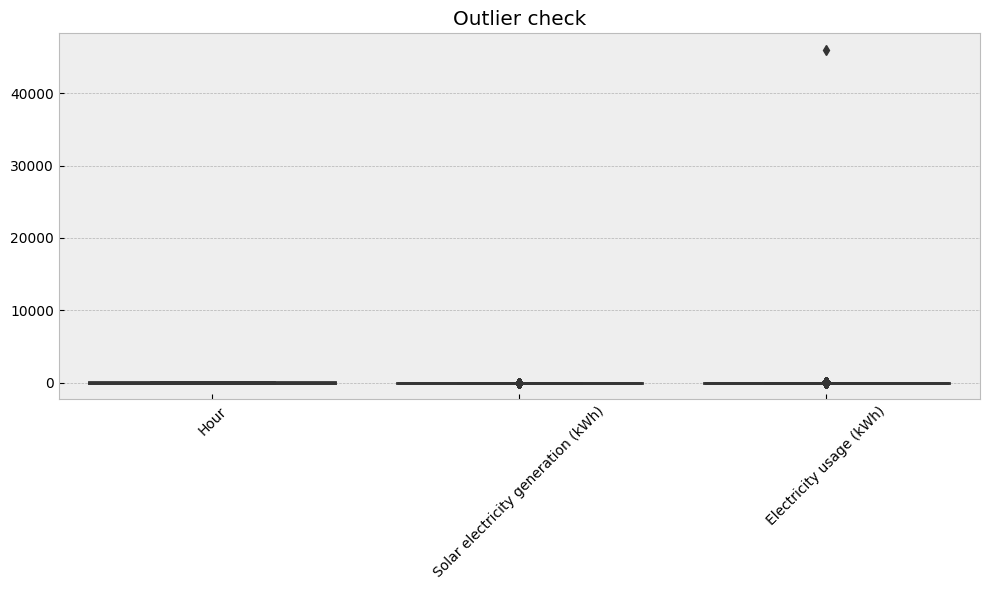

In [190]:
def box_plot(df):
       plt.figure(figsize=(10, 6))
       sns.boxplot(data= df)
       plt.xticks(rotation=45)
       plt.title('Outlier check')
       plt.tight_layout()
       plt.show()
box_plot(df)

>> From this we can see that the `solar electricity generation` column and the `electrical usage` column seem to have outliers

>> Let us investigate this further

In [191]:
# slicing the rows with the identified outliers

df[df['Electricity usage (kWh)'] > 40000]

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh)
276,12,2020-01-12 12:00:00,5.214,46000.0


>> For a solar generation of 5.214 this the electricity usage seems quite high. This is an anomaly.

>> Lets investigate rows that have a solar generation of 5 to 5.3 (kwh) and get an understanding of an estimate of electric usage

In [192]:
df[(df['Solar electricity generation (kWh)'] > 5) & (df['Solar electricity generation (kWh)'] < 5.3)]

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh)
156,12,2020-01-07 12:00:00,5.001,0.438
276,12,2020-01-12 12:00:00,5.214,46000.000
372,12,2020-01-16 12:00:00,5.025,0.459
396,12,2020-01-17 12:00:00,5.076,0.084
443,11,2020-01-19 11:00:00,5.232,1.656
...,...,...,...,...
7716,12,2020-11-18 12:00:00,5.187,0.195
7739,11,2020-11-19 11:00:00,5.121,0.144
7740,12,2020-11-19 12:00:00,5.154,0.462
7834,10,2020-11-23 10:00:00,5.241,0.264


>> This is clearly an outlier and this will be deleted


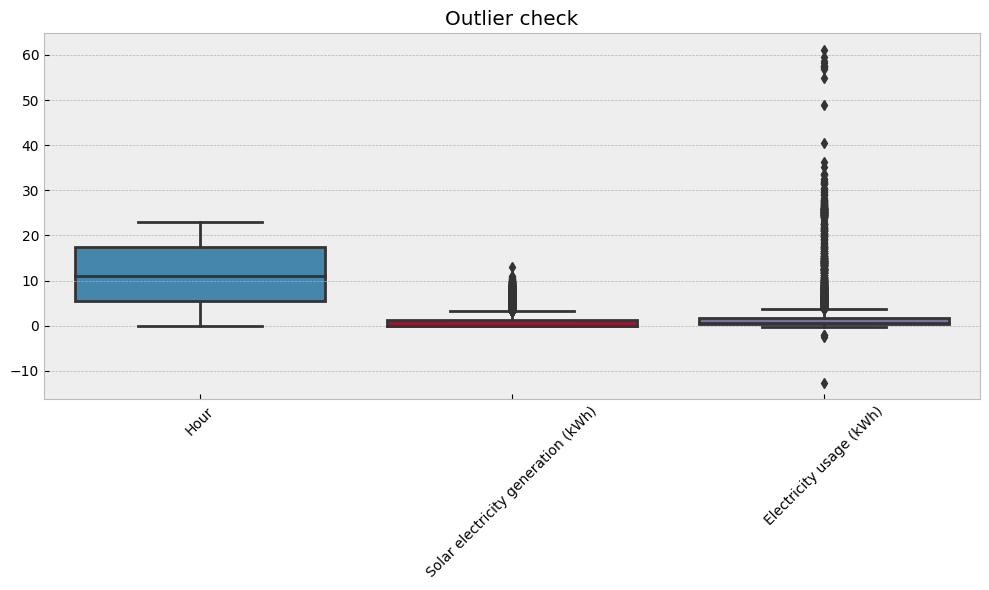

In [193]:
# deleting the outlier and reviewing the box plot

df.drop(df.index[276], axis=0, inplace=True)


box_plot(df)

>> There seems to be negatives in the usage column, this is improbable as usage cannot be a negative number

>> Lets look at this:

In [194]:
# checking for negative electrical usage

neg_values = df[df['Electricity usage (kWh)']< 0]
neg_values

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh)
17,17,2020-01-01 17:00:00,0.006,-12.6240
933,21,2020-02-08 21:00:00,0.006,-2.1330
935,23,2020-02-08 23:00:00,0.000,-0.2175
3593,17,2020-05-30 17:00:00,1.185,-2.5140
6464,8,2020-09-27 08:00:00,0.717,-1.9770


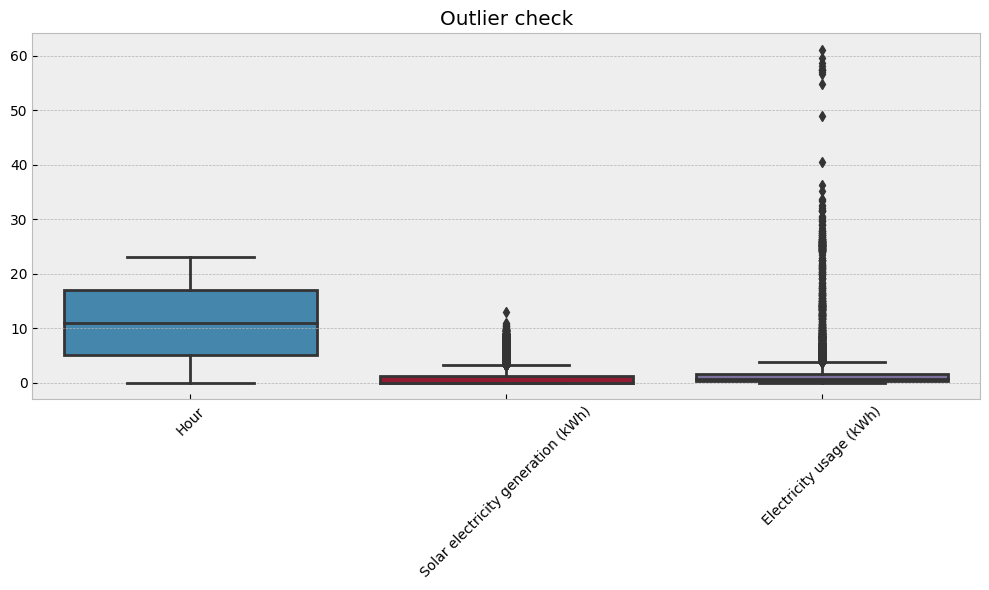

In [195]:
# I will drop the rows since the usage is an improbable


df.drop(neg_values.index, axis= 0, inplace= True)

box_plot(df)


>> The outliers have now been dealt with and can proceed with the data cleaning.

#####    `Renaming columns`


>> Renaming the columns for easier operation and removing any blank spaces


In [196]:
df.columns = df.columns.str.replace(" ", "_")
df.head()

,Hour,Date/hour_start,Solar_electricity_generation_(kWh),Electricity_usage_(kWh)
0,0,2020-01-01 00:00:00,0.0,1.509849
1,1,2020-01-01 01:00:00,0.0,1.411859
2,2,2020-01-01 02:00:00,0.0,1.023898
3,3,2020-01-01 03:00:00,0.0,0.642000
4,4,2020-01-01 04:00:00,0.0,0.960000


### `3. DATA ANALYSIS AND VISUALIZATION`

## `TASK 1`

* Creating a graph showing the average solar electricity generation and average electricity usage for each hour in a day within a 24-hour period.


>> For this exercise I will create a new dataframe with date/ time columns as the index to make visualizations easier

In [197]:
# copying the original data frame

df_copy = df.copy()

In [198]:
# setting the date/time column as the index

df_copy.set_index('Date/hour_start', inplace= True)

In [199]:
#  grouping the dataset by hour and getting the mean of the remaining columns

df_grouped = df_copy.groupby("Hour").mean()

#viewing the dataframe

df_grouped.head()


,Solar_electricity_generation_(kWh),Electricity_usage_(kWh)
Hour,,
0,0.000000,0.816471
1,0.035753,0.401552
2,0.000000,0.250623
3,0.000000,0.407688
4,0.078559,0.552038


<Figure size 5000x3000 with 0 Axes>

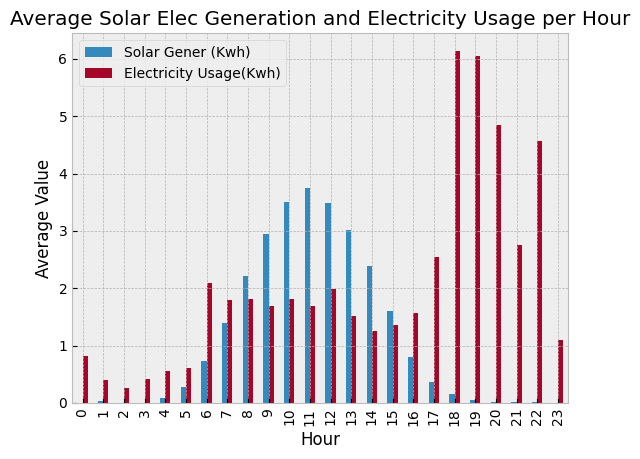

In [200]:

plt.figure(figsize=(50, 30))
df_grouped.plot(kind='bar', title='Average Solar Elec Generation and Electricity Usage per Hour')
plt.ylabel('Average Value')
plt.xlabel('Hour')
plt.legend(['Solar Gener (Kwh)', 'Electricity Usage(Kwh)'])
plt.show();

`observation:`

_`electrical usage`_

>> There is a steady rise in electricity usage throughout the day. This can be attributed to increased activity of interaction with electrical appliances. This spikes up from 5 p.m to 10 p.m  maybe due to use of resource heavy appliances like ovens

_`Solar energy Generation`_

>> As the day starts there is no solar energy generated due to zero solar power but as the day ages, more solar energy is generated. This can be attributed to presence of solar energy source with the strongest being 11 a.m then it steadily declines as the sun sets

## `TASK 2`

* Calculate, for each hour in 2020, the amount of electricity that needed to be bought from the electricity provider (measured in kWh and subject to a minimum of zero).

>> From the interpretation of this, this would be the surplus of Electricity Usage that Solar energy could not cover.

>> We then need to eliminate all negative values since there can be no negative electrical use

>> Then finally group the data

In [201]:
# creating the column that houses the surplus of electrical use

def calculation(df ,new_name , first_column, second_column):
    
    df[new_name]  =  df[first_column] - df[second_column]

    # removing the negative values 

    df[new_name] = df[new_name].apply(lambda x: x if x > 0 else 0)

    # grouping the dataset
    
    df1 = pd.DataFrame(df.groupby('Hour')[new_name].sum())
    
    return df1.style.background_gradient(cmap="Pastel1")

In [202]:
# performing the calculation

calculation(df, 'Usage_surplus(Kwh)', 'Electricity_usage_(kWh)', 'Solar_electricity_generation_(kWh)')

,Usage_surplus(Kwh)
Hour,
0,298.011806
1,146.250366
2,91.477574
3,148.806000
4,179.531000
5,174.193000
6,630.753000
7,477.084000
8,446.172000


## `TASK 3`

* Calculate, for each hour in 2020, the excess solar electricity generated over electricity used (measured in kWh and subject to a minimum of zero).

>> This is surplus of Solar Electricity over the actual electrical usage with negative values brought to zero

In [203]:
# using the defined function for the same operation

calculation(df, 'generation_surplus(Kwh)', 'Solar_electricity_generation_(kWh)', 'Electricity_usage_(kWh)')

,generation_surplus(Kwh)
Hour,
0,0.000000
1,12.734032
2,0.000000
3,0.000000
4,6.711000
5,50.010000
6,133.914000
7,333.552000
8,592.086000


## `TASK 4`

Model the cumulative battery charge level (measured in kWh) for each hour over 2020, assuming a battery had already been installed.

The battery charge level should:

•	begin at zero at 1 January 2020 00:00.

•	allow for the increase or decrease in charge level depending on the hourly results of parts (ii) and (iii).

•	be subject to the cap on the maximum battery charge level.


>> a key factor to note is Battery capacity: `Maximum 12.5 kWh`, `minimum 0 kWh`.


In [204]:
# this will be approached step by step as we break it down

# set the maximum and minimum charges

minimum_charge = 0
maximum_charge = 12.5

# Calculate battery charge levels

battery_charge_levels = []
for index, row in df.iterrows():

    # Calculate the battery charge for the current row

    battery_charge = (minimum_charge + row['Solar_electricity_generation_(kWh)']- row['Electricity_usage_(kWh)'])

    # Clip the battery charge level within the specified range

    battery_charge = max(0, min(battery_charge, maximum_charge))

    # Append the calculated battery charge to the list

    battery_charge_levels.append(battery_charge)

    # Update the minimum charge for the next iteration

    minimum_charge = battery_charge

# Add battery charge levels to the DataFrame

df['Battery_Level_(kWh)'] = battery_charge_levels

In [205]:
# viewing the dataframe

df.head(13)

,Hour,Date/hour_start,Solar_electricity_generation_(kWh),Electricity_usage_(kWh),Usage_surplus(Kwh),generation_surplus(Kwh),Battery_Level_(kWh)
0,0,2020-01-01 00:00:00,0.000,1.509849,1.509849,0.000,0.000
1,1,2020-01-01 01:00:00,0.000,1.411859,1.411859,0.000,0.000
2,2,2020-01-01 02:00:00,0.000,1.023898,1.023898,0.000,0.000
3,3,2020-01-01 03:00:00,0.000,0.642000,0.642000,0.000,0.000
4,4,2020-01-01 04:00:00,0.000,0.960000,0.960000,0.000,0.000
5,5,2020-01-01 05:00:00,0.012,0.897000,0.885000,0.000,0.000
6,6,2020-01-01 06:00:00,0.006,0.648000,0.642000,0.000,0.000
7,7,2020-01-01 07:00:00,0.009,0.774000,0.765000,0.000,0.000
8,8,2020-01-01 08:00:00,0.012,1.299000,1.287000,0.000,0.000
9,9,2020-01-01 09:00:00,0.846,0.606000,0.000000,0.240,0.240


## `TASK 5`


* Calculate the amount of electricity for each hour in 2020 that would have been bought from the electricity provider (measured in kWh and subject to a minimum of zero), assuming a battery had already been installed.

>> This takes into account that we are able to store extra solar energy, so this should reduce usage surplus by the same amount as battery level

In [206]:
# we will use the calculation function to achieve this

calculation(df,'Purchased_elec_(with_batt)', 'Usage_surplus(Kwh)', 'Battery_Level_(kWh)')

,Purchased_elec_(with_batt)
Hour,
0,278.245376
1,133.100521
2,82.416309
3,136.110577
4,172.625343
5,169.579637
6,629.924580
7,471.630000
8,443.076000


## `TASK 6`

Calculate the saving over 2020 (in dollars ($), using 1 January 2022 electricity prices and ignoring discounting) from installing a battery compared to using the existing solar panels alone.

>> The cost savings would be the battery level, since any time a battery was used, less electricity was purchased

>> Cost of purchased electricity was  `$0.17` 

In [207]:
df['cost_savings'] = df['Battery_Level_(kWh)'] * 0.17

print('The cost savings for 2020 are :','$',df['cost_savings'].sum().round(2))

The cost savings for 2020 are : $ 4776.44


## `TASK 7`

Tabulate the data appropriately and then produce a chart to illustrate, on a monthly basis for the calendar year and measured in kWh, the:


>> `a. monthly solar generation`

In [208]:
# create a copied dataframe for this exercise

df_copy = df.copy()

# set the datetime column as the index since i will visualize this as a time series trend

df_copy.set_index('Date/hour_start', inplace= True)

# extract and create a month column for the visualizations

df_copy['Month'] = df_copy.index.month

# view the first five rows

df_copy.head(5)

,Hour,Solar_electricity_generation_(kWh),Electricity_usage_(kWh),Usage_surplus(Kwh),generation_surplus(Kwh),Battery_Level_(kWh),Purchased_elec_(with_batt),cost_savings,Month
Date/hour_start,,,,,,,,,
2020-01-01 00:00:00,0,0.0,1.509849,1.509849,0.0,0.0,1.509849,0.0,1
2020-01-01 01:00:00,1,0.0,1.411859,1.411859,0.0,0.0,1.411859,0.0,1
2020-01-01 02:00:00,2,0.0,1.023898,1.023898,0.0,0.0,1.023898,0.0,1
2020-01-01 03:00:00,3,0.0,0.642000,0.642000,0.0,0.0,0.642000,0.0,1
2020-01-01 04:00:00,4,0.0,0.960000,0.960000,0.0,0.0,0.960000,0.0,1


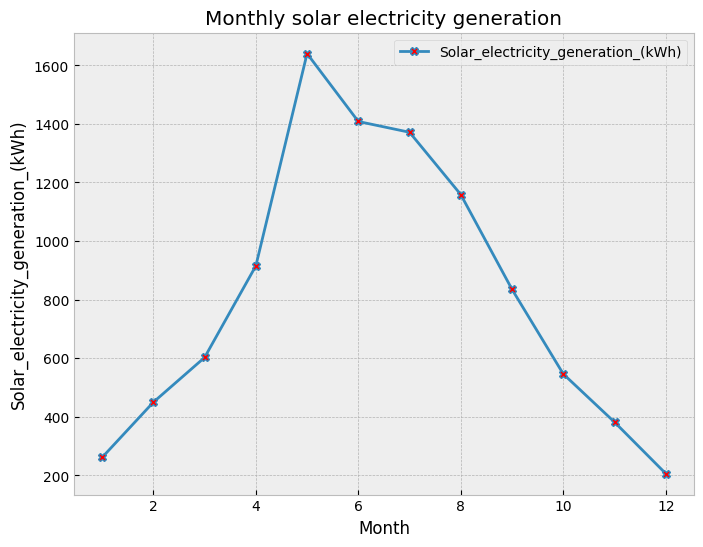

In [209]:
## creating a function to ease visualization

def visuals(df_copy,column,title):
    
    # Calculate the sum of the specified column for each month

    monthly_generation = df_copy.groupby('Month')[column].sum()

    # Calculate the sum of the specified column for each month

    monthly_generation = pd.DataFrame(monthly_generation)

    monthly_generation.plot(figsize=(8, 6), marker='X', markerfacecolor='red')

    # Calculate the sum of the specified column for each month

    plt.ylabel(column)

    # Calculate the sum of the specified column for each month

    plt.title(title)

visuals(df_copy,'Solar_electricity_generation_(kWh)','Monthly solar electricity generation')

`observation:`

>> The variations can be attributed to the diverse weather patterns and seasonal changes throughout the year.

>> The highest monthly solar generation, around 1650 kWh, is evident in month 5.

>> Conversely, the lowest monthly solar generation of 200 kWh is prominently visible in month 12.



>> `b. Monthly electricity usage`

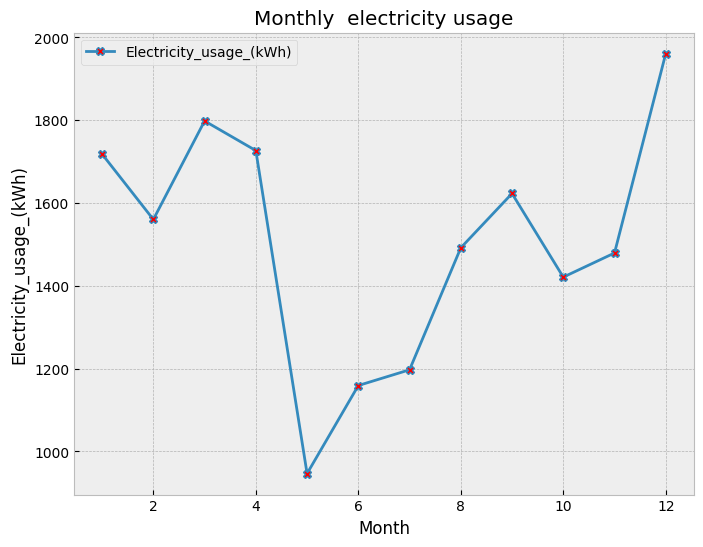

In [210]:
visuals(df_copy,'Electricity_usage_(kWh)','Monthly  electricity usage')

`observation:`

>> It is evident that month 5 experiences the lowest monthly electricity usage

>> In contrast, month 12 stands out with the highest monthly electricity usage

>> These variations in electricity consumption can be attributed not only to the diverse weather patterns and changing seasons throughout the year but also to potential shifts in energy demands driven by factors such as holiday festivities, increased indoor heating or cooling requirements, and altered work patterns.


>> `c. monthly electricity purchased from the electricity provider (no battery)`

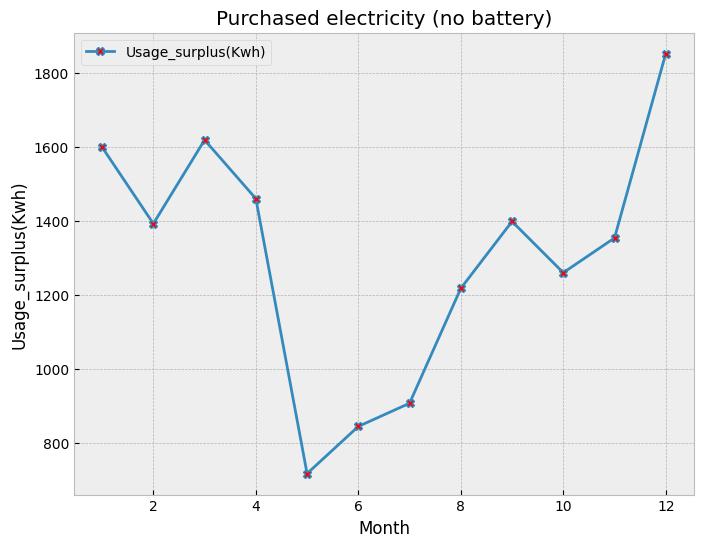

In [211]:
visuals(df_copy,'Usage_surplus(Kwh)','Purchased electricity (no battery)')

`Observaion`

>> Due to seasonality changes, there is a sudden drop of purchased electricity from month 3 to 5 and conversely rises from October to December

`d. monthly electricity purchased from the electricity provider (with battery).`

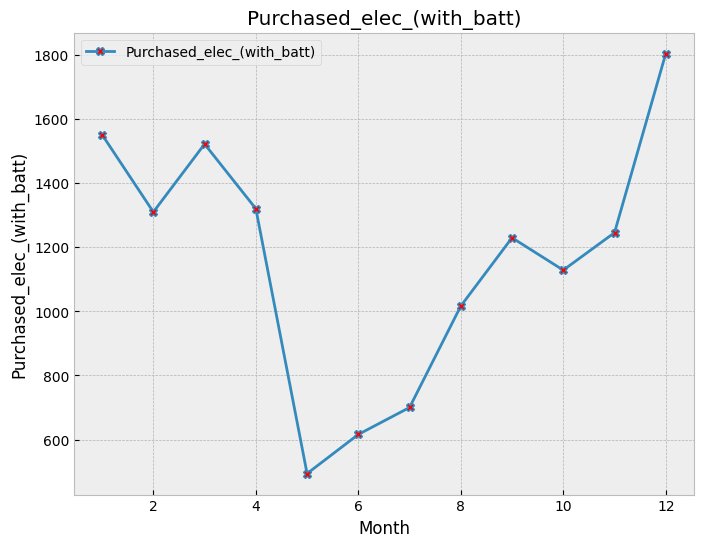

In [212]:
visuals(df_copy,'Purchased_elec_(with_batt)','Purchased_elec_(with_batt)')

`Observation`

>> Due to the saving component of having a battery, the purchasing levels levels are a bit lower for example in month` 6(June)` ,`October(10)` and `December(12)`

## `TASK 8`

Project forward for 20 years from 1 January 2022 the annual savings from installing the battery for the two scenarios below.

For the two scenarios, calculate the Net Present Value (NPV) of the future annual savings.

_`scenario a`_

* Electricity prices increase as expected by the government, 4% p.a.

_`scenario b`_

* Electricity price increases start at 4% p.a. and rise each year by an additional 0.25% p.a., as estimated by Naomi.

_`Things to note`_

* 20 years from 1st Jan 2022 is 1st Jan 2042
* This is 22 years from the training set which begins on 2020
* Electricity cost is `0.17 dollars`

>> For this we will be using FB Prophet due to its accuracy and simplicity

>> we will then train the model on a month by month basis, this will capture various seasonality changes and patterns in usages and break nuances

>> First lets train the model before we tackle the scenarios

` creating the model dataframe`

>> The model dataframe will have the grouped by month and the battery level columns since the savings are a derivative of batterly level column multiplied by the cost of purchase of electricity

>> The logic behind this is that anytime the battery level was not zero, it signified electricity purchased forgone hence translates to a saving of that cost(`foregone cost`)

In [213]:
# creating a copy of the data frame

model_df = df.copy()

# extract the month and year from the date columns

model_df['period'] = model_df['Date/hour_start'].dt.strftime('%Y-%m')

# grouping by periond and summation of battery level

model_df= model_df.groupby('period')['Battery_Level_(kWh)'].sum().reset_index()

# viewing the dataset

model_df.shape


(12, 2)

In [214]:
# modelling using fb prophet

# naming the model to fit parameters

final_df = model_df.rename(columns={'period': 'ds', 'Battery_Level_(kWh)': 'y'})

# initialize the model

model = Prophet()

# fitting the model

model.fit(final_df)

# create 22 year projection

projection = model.make_future_dataframe(periods = 253, freq ='MS')

# predict

prediction = model.predict(projection)

predicted_df = prediction[['ds', 'yhat']]



19:16:15 - cmdstanpy - INFO - Chain [1] start processing
19:16:15 - cmdstanpy - INFO - Chain [1] done processing


In [215]:
# removing any negative values from y hat since we cant have negative battery usage

predicted_df['yhat'] = predicted_df['yhat'].apply(lambda x: x if x > 0 else 0)

# renaming my columns

predicted_df.rename(columns={'ds': 'year','yhat': 'Battery_Level(kwh)'}, inplace= True)

# extracting the year

predicted_df['year'] = predicted_df['year'].dt.year

# grouping the dataset

predicted_df = predicted_df.groupby('year')['Battery_Level(kwh)'].sum().reset_index()
predicted_df.style.background_gradient(cmap="Pastel1")

,year,Battery_Level(kwh)
0,2020,28015.885221
1,2021,27213.115020
2,2022,26410.711215
3,2023,25608.307410
4,2024,24804.071633
5,2025,24001.301434
6,2026,23198.897630
7,2027,22396.493825
8,2028,21592.258048
9,2029,20789.487849


>> _`scenario a`_

* Electricity prices increase as expected by the government, 4% p.a.

In [216]:
predicted_df['cost'] = 0.17

interest_rate = 0.04  # 4% p.a.

for year in range(predicted_df['year'].min(), predicted_df['year'].max() + 1):
    # Calculate compounded cost increase for the current year
    cost = predicted_df['cost'][predicted_df['year'] == year].iloc[0] * (1 + interest_rate)**(year - predicted_df['year'].min())
    predicted_df.loc[predicted_df['year'] == year, 'compound_cost'] = cost

# Calculating annual savings from installing the battery for the Electricity prices increase as expected by the government, 4% p.a.

predicted_df['Annual_savings_at_4%'] = predicted_df['Battery_Level(kwh)'] * predicted_df['compound_cost']
predicted_df

,year,Battery_Level(kwh),cost,compound_cost,Annual_savings_at_4%
0,2020,28015.885221,0.17,0.170000,4762.700488
1,2021,27213.115020,0.17,0.176800,4811.278735
2,2022,26410.711215,0.17,0.183872,4856.190293
3,2023,25608.307410,0.17,0.191227,4896.996728
4,2024,24804.071633,0.17,0.198876,4932.933439
5,2025,24001.301434,0.17,0.206831,4964.213019
6,2026,23198.897630,0.17,0.215104,4990.181084
7,2027,22396.493825,0.17,0.223708,5010.283855
8,2028,21592.258048,0.17,0.232657,5023.584336
9,2029,20789.487849,0.17,0.241963,5030.287017


>> _`scenario b`_

* Electricity price increases start at 4% p.a. and rise each year by an additional 0.25% p.a., as estimated by Naomi.

In [219]:
## setting price increase

price_increase = 0.0425  

# Create a new column to store the calculated compounded costs

predicted_df['compound_cost_4.25%'] = predicted_df['compound_cost']

for year in range(predicted_df['year'].min() + 2, predicted_df['year'].max() + 1):
    
    # Calculate compounded cost increase for the current year
    
    compounded_cost = predicted_df['compound_cost_4.25%'][predicted_df['year'] == year].iloc[0] * (1 + interest_rate)**((year) - 2020)
    
    predicted_df.loc[predicted_df['year'] == year, 'compound_cost_4.25%'] = compounded_cost

# Calculating annual savings 
predicted_df['Annual_savings_at_4.25%)'] = predicted_df['Battery_Level(kwh)'] * predicted_df['compound_cost_4.25%']
predicted_df

,year,Battery_Level(kwh),cost,compound_cost,Annual_savings_at_4%,compound_cost_4.25%,Annual_savings_at_4.25%)
0,2020,28015.885221,0.17,0.170000,4762.700488,0.170000,4762.700488
1,2021,27213.115020,0.17,0.176800,4811.278735,0.176800,4811.278735
2,2022,26410.711215,0.17,0.183872,4856.190293,0.198876,5252.455420
3,2023,25608.307410,0.17,0.191227,4896.996728,0.215104,5508.455328
4,2024,24804.071633,0.17,0.198876,4932.933439,0.232657,5770.834409
5,2025,24001.301434,0.17,0.206831,4964.213019,0.251642,6039.724177
6,2026,23198.897630,0.17,0.215104,4990.181084,0.272175,6314.171032
7,2027,22396.493825,0.17,0.223708,5010.283855,0.294385,6593.191747
8,2028,21592.258048,0.17,0.232657,5023.584336,0.318407,6875.122044
9,2029,20789.487849,0.17,0.241963,5030.287017,0.344389,7159.666931


>> ### `Net present Value` 

_`Scenario a`_

* discount_rate = 0.06%

In [222]:
# Calculate the discounted annual savings for Scenario 1

def discounted(new_name, column):

    predicted_df[new_name] = predicted_df[column] / ((1 + 0.06) ** (predicted_df['year'] - predicted_df['year'].min()))

    return predicted_df.head()

discounted('discounted_scenario_1',"Annual_savings_at_4%")

,year,Battery_Level(kwh),cost,compound_cost,Annual_savings_at_4%,compound_cost_4.25%,Annual_savings_at_4.25%),discounted_scenario_1
0,2020,28015.885221,0.17,0.170000,4762.700488,0.170000,4762.700488,4762.700488
1,2021,27213.115020,0.17,0.176800,4811.278735,0.176800,4811.278735,4538.942203
2,2022,26410.711215,0.17,0.183872,4856.190293,0.198876,5252.455420,4321.992072
3,2023,25608.307410,0.17,0.191227,4896.996728,0.215104,5508.455328,4111.612882
4,2024,24804.071633,0.17,0.198876,4932.933439,0.232657,5770.834409,3907.345318


_`Scenario b`_



In [224]:
discounted('discounted_scenario_2',"Annual_savings_at_4.25%)")

,year,Battery_Level(kwh),cost,compound_cost,Annual_savings_at_4%,compound_cost_4.25%,Annual_savings_at_4.25%),discounted_scenario_1,discounted_scenario_2
0,2020,28015.885221,0.17,0.170000,4762.700488,0.170000,4762.700488,4762.700488,4762.700488
1,2021,27213.115020,0.17,0.176800,4811.278735,0.176800,4811.278735,4538.942203,4538.942203
2,2022,26410.711215,0.17,0.183872,4856.190293,0.198876,5252.455420,4321.992072,4674.666625
3,2023,25608.307410,0.17,0.191227,4896.996728,0.215104,5508.455328,4111.612882,4625.005313
4,2024,24804.071633,0.17,0.198876,4932.933439,0.232657,5770.834409,3907.345318,4571.041367


>> ### `IRR` 

_`Scenario a`_


FORMULA (simplified for our dataset)

>> Internal Rate of Return (IRR) = (Future Value ÷ Present Value)^(1 ÷ Number of Periods) – 1


In [226]:
# defining a function for re-usability

def irr(new_name, column ,colum2):
    
    predicted_df[new_name] = (predicted_df[column] / predicted_df[colum2])**((1 / 22) - 1)
    
    return predicted_df.head()

irr('scenario_1_IRR', 'Annual_savings_at_4%', 'discounted_scenario_1' ) 

,year,Battery_Level(kwh),cost,compound_cost,Annual_savings_at_4%,compound_cost_4.25%,Annual_savings_at_4.25%),discounted_scenario_1,discounted_scenario_2,scenario_1_IRR
0,2020,28015.885221,0.17,0.170000,4762.700488,0.170000,4762.700488,4762.700488,4762.700488,1.000000
1,2021,27213.115020,0.17,0.176800,4811.278735,0.176800,4811.278735,4538.942203,4538.942203,0.945898
2,2022,26410.711215,0.17,0.183872,4856.190293,0.198876,5252.455420,4321.992072,4674.666625,0.894723
3,2023,25608.307410,0.17,0.191227,4896.996728,0.215104,5508.455328,4111.612882,4625.005313,0.846317
4,2024,24804.071633,0.17,0.198876,4932.933439,0.232657,5770.834409,3907.345318,4571.041367,0.800530


_`Scenario b`_


In [228]:
# calculating the IRR


irr('scenario_2_IRR', 'Annual_savings_at_4.25%)', 'discounted_scenario_2' ) 

,year,Battery_Level(kwh),cost,compound_cost,Annual_savings_at_4%,compound_cost_4.25%,Annual_savings_at_4.25%),discounted_scenario_1,discounted_scenario_2,scenario_1_IRR,scenario_2_IRR
0,2020,28015.885221,0.17,0.170000,4762.700488,0.170000,4762.700488,4762.700488,4762.700488,1.000000,1.000000
1,2021,27213.115020,0.17,0.176800,4811.278735,0.176800,4811.278735,4538.942203,4538.942203,0.945898,0.945898
2,2022,26410.711215,0.17,0.183872,4856.190293,0.198876,5252.455420,4321.992072,4674.666625,0.894723,0.894723
3,2023,25608.307410,0.17,0.191227,4896.996728,0.215104,5508.455328,4111.612882,4625.005313,0.846317,0.846317
4,2024,24804.071633,0.17,0.198876,4932.933439,0.232657,5770.834409,3907.345318,4571.041367,0.800530,0.800530


### `4. Conclusion`

This  model provides in-depth insights into a range of potential scenarios related to battery charge levels, shedding light on their direct impact on annual cost savings. By considering a variety of assumptions and parameters, the model becomes a valuable decision-making tool for devising strategic energy management plans. Stakeholders can leverage the model's capabilities to proactively anticipate and gauge potential outcomes, empowering them to make well-informed choices.

The methodology employed is not only comprehensive but also comprehensible, ensuring that users have a clear understanding of the intricate calculations and underlying assumptions that underpin the presented results. This transparency fosters confidence in the reliability of the insights generated by the model and instills a sense of trust among stakeholders.

In sum, this model stands as a powerful ally for navigating the complexities of energy management. Its ability to project various charge level scenarios and their financial implications, combined with its transparent methodology, equips decision-makers with a potent tool to steer energy strategies toward optimal outcomes and effectively plan for the future.

# `DOCUMENTATION`

# `SOLAR ENERGY AND ELECTRICAL USAGE ANALYSIS`

`1.	DATA UNDERSTANDING`

•	The data comprises of historical data from the year 2020 and encompasses solar energy generation and electrical usage per hour.

•	The data had 8760 rows and 3 columns.

`2.	DATA CHECKS`

•	The data set was checked for duplicate and null values and none were found

•	Outliers were singled out in the energy usage column and these were deleted from the dataset
 
•	The outliers were dropped because:

o	In comparison with the rest of the dataset, electrical usage of 46,000 kwh was too high

o	There are no negative values for electrical usage as this is scientifically improbable in relation to electricity.



`3.	Model Purpose`

•	The model used was intended to predict annual cost savings over a twenty year period.

•	FB Prophet was used to achieve this.


`4.	Methodology and Plan of Approach`

•	The model data frame was grouped by month and the battery level columns since the savings are a derivative of battery level column multiplied by the cost of purchase of electricity.

•	The logic behind this is that anytime the battery level was not zero, it signified electricity purchased forgone hence translates to a saving of that cost (foregone cost).

`5.	Calculations and Feature Engineering`

•	Month and Year were extracted from the date time column.

•	The new column was then grouped and a summation of battery level throughout the month was generated

•	From the scenarios, the new battery level now forecasted over a twenty year period, was used to calculate cost saving for both the scenarios

•	Compounded cost was first calculated and this multiplied by battery level to reach the annual cost savings.

•	Net Present Value was calculated from the new cost saving figures in both scenarios.

•	IRR was then generated with the new columns using the formula below.

 

`6.	Assumptions made`

•	The discounting rate remained constant throughout the twenty year period

•	No external factors save for seasonality affected the data set

•	This would include purchase or sale and use of new electrical appliances, number of family members will stay the same, and factors such global warming, damages, repairs and maintenance will not affect solar energy generation nor the electrical usage.

•	Apart from the outliers the rest of the dataset provided is accurate or has minimal errors
